## Imports and Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
PULSE_WIDTH = 100
NOISE_SAMPLES = 50

In [2]:
def generateRectSignal(start, N,value):
    x = np.linspace(start, start+1)
    y=np.ones(int(N))*value
    y=y/math.sqrt(N)
    return x, y

In [3]:
def plot_rect(data_len,signal_to_plot,title,color='b'):
    plt.grid(True)
    x = np.linspace(0, data_len, len(signal_to_plot))
    plt.vlines(x[0], 0, signal_to_plot[0], color=color)
    plt.vlines(x[-1], 0, signal_to_plot[-1], color=color)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.plot(x,signal_to_plot,color)
    plt.show()
def plot_2_signals(data_len,signal1,signal2,title1,title2,color1='b',color2='r'):
    x = np.linspace(0, data_len, len(signal1))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal1,color1)
    plt.subplot(1,2,2)
    plt.title(title2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal2,color2)
    plt.show()

## Plotting s1(t) and s2(t)

In [4]:
_,s1=generateRectSignal(0,PULSE_WIDTH,1)
s2 = np.concatenate((np.ones(int(PULSE_WIDTH*0.75)),np.ones(int(PULSE_WIDTH*0.25))*-1))
s2/=math.sqrt(PULSE_WIDTH)

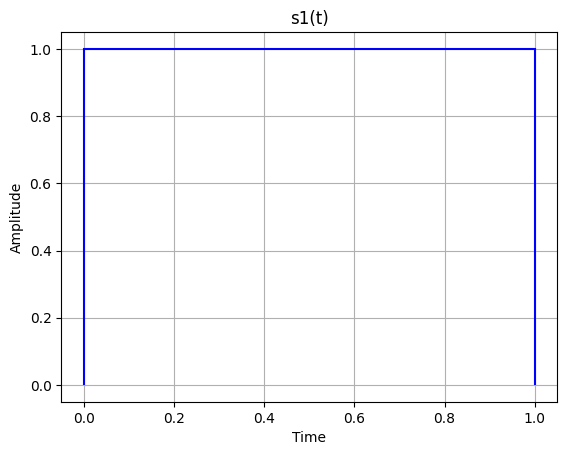

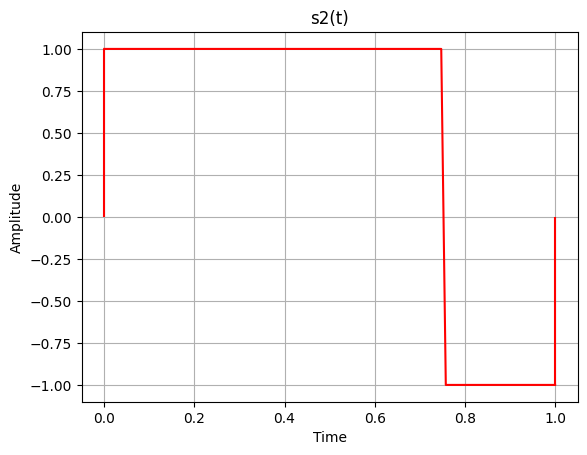

In [5]:
plot_rect(1,s1*math.sqrt(PULSE_WIDTH),'s1(t)')
plot_rect(1,s2*math.sqrt(PULSE_WIDTH),'s2(t)','r')

## Gram-Schmidt

In [6]:
def gm_bases(s1,s2):
    e1=np.dot(s1,s1)/PULSE_WIDTH
    s11 = np.sqrt(e1)
    phi1=s1/s11
    g2= s2 - np.dot(s2,phi1)/PULSE_WIDTH
    phi2 = g2/np.sqrt(np.dot(g2,g2)/PULSE_WIDTH)
    return [phi1,phi2]

## Signal Space

In [7]:
def signal_space(s,phi1,phi2):
    v1 = np.dot(s,phi1)
    v2 = np.dot(s,phi2)
    return [v1,v2]

## Signal With AWGN

In [8]:
def signal_with_awgn(s,variance):
    noise = np.random.normal(0,variance**0.5,len(s))
    noise/=math.sqrt(PULSE_WIDTH)
    return s+noise

## Gram-Schmidt Plotting

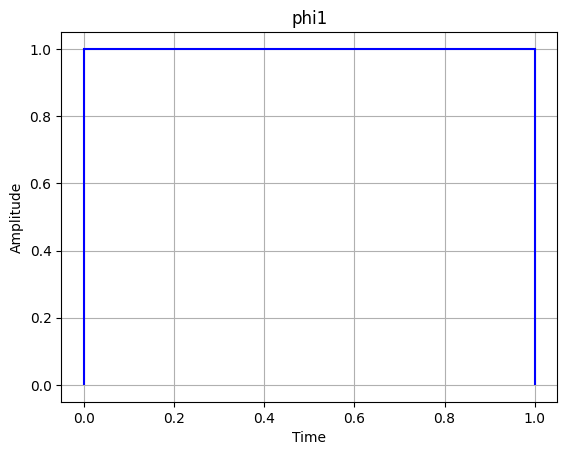

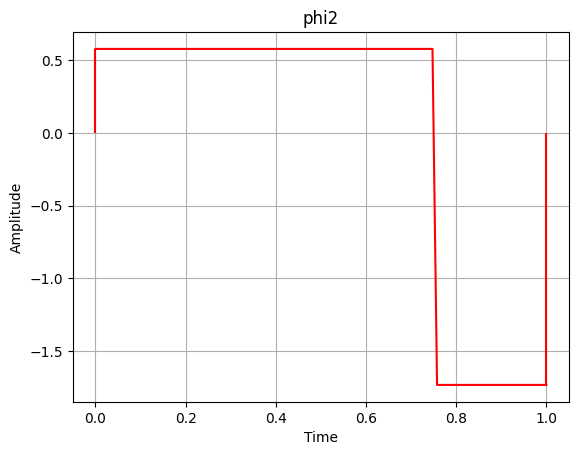

In [9]:
[phi1,phi2]=gm_bases(s1,s2)
plot_rect(1,phi1,'phi1')
plot_rect(1,phi2,'phi2','r')

## Signal Space

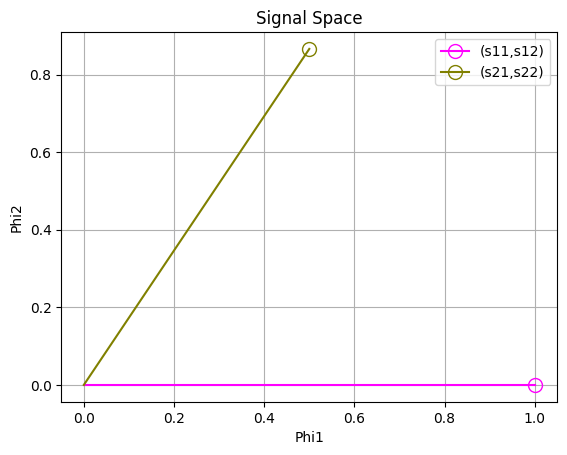

In [10]:
[s11,s12]=signal_space(s1,phi1,phi2)
[s21,s22]=signal_space(s2,phi1,phi2)
s11 = s11/math.sqrt(PULSE_WIDTH)
s12 = s12/math.sqrt(PULSE_WIDTH)
s21 = s21/math.sqrt(PULSE_WIDTH)
s22 = s22/math.sqrt(PULSE_WIDTH)
x= np.linspace(0, s11)
plt.grid(True)
m= s12/s11
y=m*x
plt.title('Signal Space')
plt.xlabel('Phi1')
plt.plot(x,y,'magenta',markevery=[-1],marker='o',fillstyle='none',markeredgecolor='magenta',markersize=10)
x= np.linspace(0, s21)
m= s22/s21
y=m*x
plt.ylabel('Phi2')
plt.plot(x,y,'olive',markevery=[-1],marker='o',fillstyle='none',markeredgecolor='olive',markersize=10)
plt.legend(['(s11,s12)','(s21,s22)'])
plt.show()

## Signal Space for AWGN signal samples

In [11]:
original_s11 = s11
original_s12 = s12
original_s21 = s21
original_s22 = s22

Energy of s1: 1.0000000000000002
Energy of s2: 1.0000000000000002


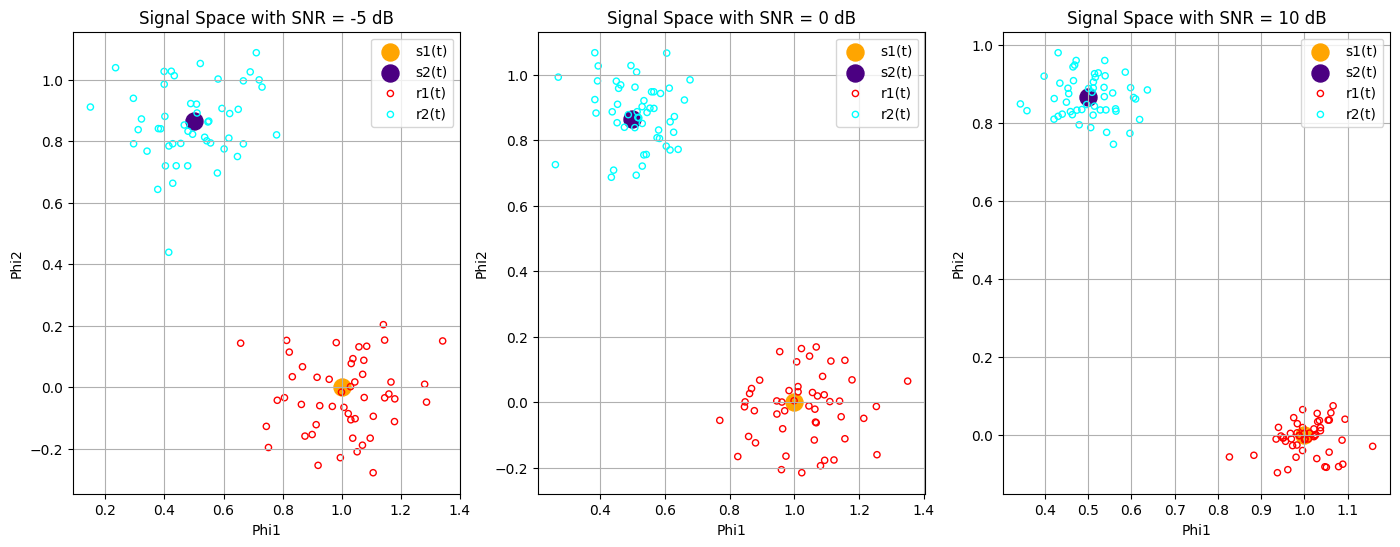

In [12]:
e1 = np.dot(s1,s1)
e2 = np.dot(s2,s2)
print('Energy of s1:',e1)
print('Energy of s2:',e2)
std_in_DB = [-5,0,10]
std_in_decimal = [10**(i/10) for i in std_in_DB]
std_for_s1 = [(e1/i)**0.5 for i in std_in_decimal]
std_for_s2 = [(e2/i)**0.5 for i in std_in_decimal]

plt.figure(figsize=(17,6))
for j in range(len(std_for_s1)):
    plt.subplot(1,3,j+1)
    plt.grid(True)
    plt.scatter([original_s11],[original_s12],color='orange',s=150)
    plt.scatter([original_s21],[original_s22],color='indigo',s=150)
    for i in range(NOISE_SAMPLES):
        s1_with_noise = signal_with_awgn(s1,std_for_s1[j])
        s2_with_noise = signal_with_awgn(s2,std_for_s2[j])
        [s11,s12]=signal_space(s1_with_noise,phi1,phi2)
        [s21,s22]=signal_space(s2_with_noise,phi1,phi2)
        plt.scatter([s11/math.sqrt(PULSE_WIDTH)],[s12/math.sqrt(PULSE_WIDTH)],facecolors='none',edgecolors='red',s=20)
        plt.scatter([s21/math.sqrt(PULSE_WIDTH)],[s22/math.sqrt(PULSE_WIDTH)],facecolors='none',edgecolors='cyan',s=20)
    plt.title('Signal Space with SNR = '+str(std_in_DB[j])+' dB')
    plt.legend(['s1(t)','s2(t)','r1(t)','r2(t)'])
    plt.xlabel('Phi1')
    plt.ylabel('Phi2')
    

### How does the noise affect the signal space?

 It can be concluded form the graph that by adding the noise the projections of
 noised signals over both phi1 and phi2 deviates from the signal without noise
 which means that [s11,s12,s21,s22] changes randomly

### Does the noise effect increase or decrease with increasing 𝜎^2 ?

It can be concluded form the graph that by increasing 𝜎^2 the noise effect increses which mean the diviation from the original increase or the scattering increases